In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
iodineData = np.genfromtxt("iodineAtlas.txt",skip_header=5)

In [3]:
#The second column of the iodineData is a wavenumber (cm^-1)
#In order to convert this to a wavelength (nm)
# x nm = 10,000,000 / x cm–1
def WavenumberToWavelength(wavenumber):
    '''
    cm^-1 to angstroms
    '''
    return 100000000/wavenumber
#Changing all wavenumbers from the iodineData 
for i in range(iodineData.shape[0]):
    iodineData[i][0] = WavenumberToWavelength(iodineData[i][0])

In [4]:

wavelength = []
transmission = []
for pair in iodineData:
    wavelength += [pair[0]]
    transmission += [pair[1]]


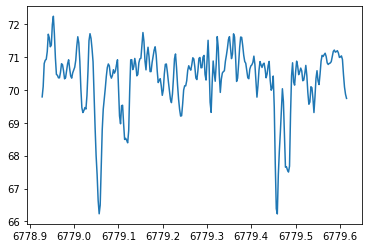

In [5]:
plt.plot(wavelength[100000:100300],transmission[100000:100300])
plt.show()

In [6]:
print(min(wavelength))
print(max(wavelength)) #In angstroms 

4987.5062967267
7017.494614072883


Done with cleaning up and now I am looking for the strong iodine lines at 5119.29, 5161.2, 5245.71, 5338.22, 5345.15, 5435.83, 5464.62, 5625.69, 5690.91, 5710.53, 5950.25, 6074.98, 5127.49, 6619.66, 6812.57. According to https://www.physics.nist.gov/PhysRefData/Handbook/Tables/iodinetable2.htm 

In [7]:
def lookingForLine(line,wavelengthList):
    '''
    Gives a wavelength range the line should be at
    '''
    i = len(wavelengthList) - 1  #The list is backwards (At least the original was)
    while wavelengthList[i] < line:
        i -= 1
    return int(i-50),int(i+150) #start, end 

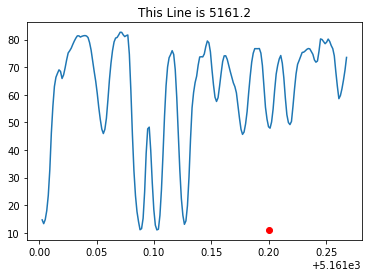

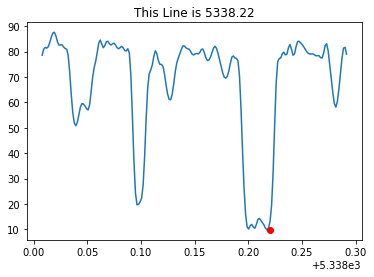

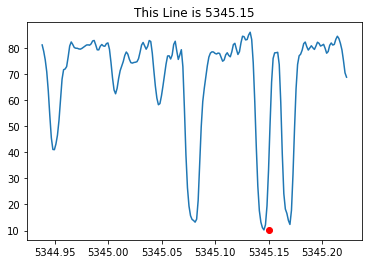

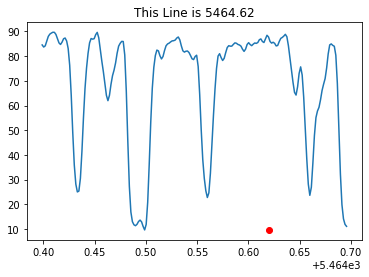

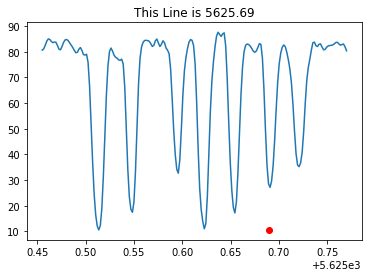

In [9]:
#w = [5119.29, 5161.2, 5245.71, 5338.22, 5345.15, 5435.83, 5464.62, 5625.69,5690.91, 5710.53, 5950.25, 6074.98, 5127.49, 6619.66, 6812.57] 
w = [5161.20, 5338.22, 5345.15, 5464.62, 5625.69]#https://www.physics.nist.gov/PhysRefData/Handbook/Tables/iodinetable4.htm
for line in w:
    s, e = lookingForLine(line,wavelength)
    plt.plot(wavelength[s:e],transmission[s:e])
    plt.plot(line,min(transmission[s:e]),'ro') 
    plt.title("This Line is {}".format(line))
    plt.show()
    

In [9]:
# linesThatCouldBeUsed = [5119.29,5161.2,5337.22,5345.15,5625.69,
#                        5710.53,6074.98]
# linesThatAreBad = [5245.71,5435.83,5464.62,5690.91,5950.25,5127.49,
#                   6619.66,6812.57]


